# Preface

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for seleceted two Cities- Sao Paulo(Brazil) and New York (USA) to show if these weather variables impact Covid new cases increase.

Data:

1. Resources folder under Archana Branch- https://github.com/archinarula/Group-5-Project/tree/Archana/Archana_WorkingFolder/Resources



# Dependencies and Load Data

In [1]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

Import the combined data

In [7]:
# Add the Resources path variables:
Combined_data="Resources/Final_Combine_Data.csv"

#Read CSVs and Create Dataframes:
Combined_df_all= pd.read_csv(Combined_data, parse_dates=['Reported_Date'], encoding="ISO-8859-1",low_memory=False)


In [8]:
#Combined dataframe
print (Combined_df_all.shape)
Combined_df_all.head()


(886, 15)


,Reported_Date,City,is_newyork,Population,Data Source,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [9]:
# Delete extraneous columns
Combined_df=Combined_df_all.drop(["is_newyork","Population","Data Source"], axis=1)
Combined_df.head()

,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [10]:
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Reported_Date                 886 non-null    datetime64[ns]
 1   City                          886 non-null    object        
 2   New_Cases                     886 non-null    int64         
 3   mavg_7day_new_cases           886 non-null    int64         
 4   new_cases_per_100K            886 non-null    float64       
 5   mavg_7day_per_100k_new_cases  886 non-null    float64       
 6   daily_temp                    886 non-null    float64       
 7   daily_humidity                886 non-null    float64       
 8   mavg_7_temp                   886 non-null    float64       
 9   mavg_7_humidity               886 non-null    float64       
 10  mavg_15_temp                  886 non-null    float64       
 11  mavg_15_humidity              88

In [11]:
import warnings
warnings.filterwarnings("ignore")

# CORRELATION- Both Cities combined

Both Cities-all variables

<AxesSubplot:>

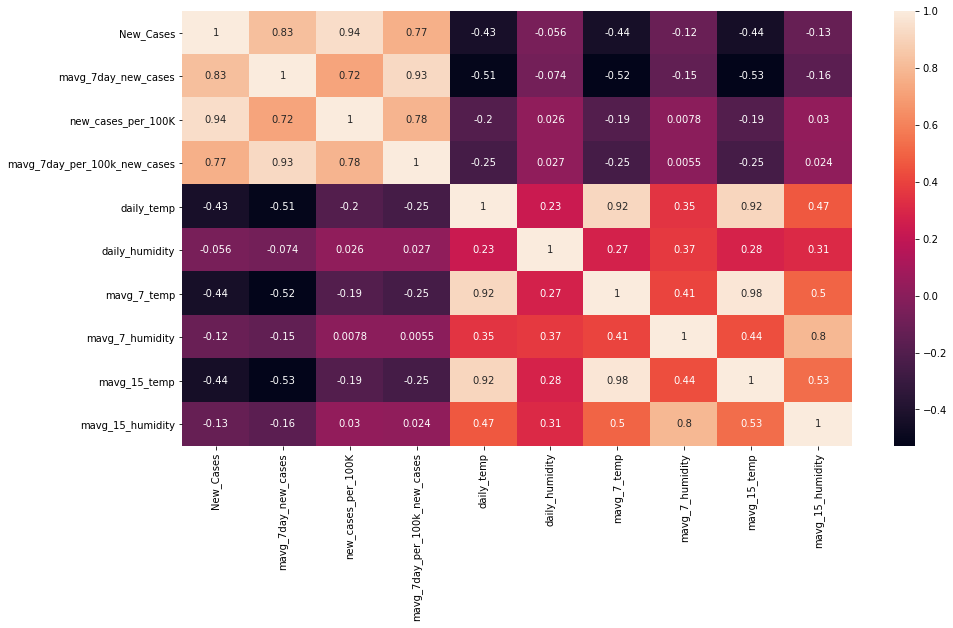

In [12]:
# Let us get the correlation in the data using Seaborn Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(Combined_df.corr(), annot = True)

In [13]:
# Correlation using Spearman correlation test 
Combined_df.corr(method='spearman').style.background_gradient('viridis')

,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
New_Cases,1.000000,0.851241,0.973197,0.804309,-0.402953,-0.048287,-0.406767,-0.128609,-0.419424,-0.151052
mavg_7day_new_cases,0.851241,1.000000,0.818863,0.952097,-0.444558,-0.053006,-0.447524,-0.138495,-0.459027,-0.165183
new_cases_per_100K,0.973197,0.818863,1.000000,0.836401,-0.265403,0.006722,-0.266514,-0.021672,-0.279694,-0.014818
mavg_7day_per_100k_new_cases,0.804309,0.952097,0.836401,1.000000,-0.256094,0.018290,-0.252566,0.000301,-0.262260,0.017082
daily_temp,-0.402953,-0.444558,-0.265403,-0.256094,1.000000,0.149263,0.902912,0.345019,0.883987,0.506404
daily_humidity,-0.048287,-0.053006,0.006722,0.018290,0.149263,1.000000,0.236298,0.285408,0.239906,0.268408
mavg_7_temp,-0.406767,-0.447524,-0.266514,-0.252566,0.902912,0.236298,1.000000,0.364308,0.967381,0.510836
mavg_7_humidity,-0.128609,-0.138495,-0.021672,0.000301,0.345019,0.285408,0.364308,1.000000,0.412771,0.751286
mavg_15_temp,-0.419424,-0.459027,-0.279694,-0.262260,0.883987,0.239906,0.967381,0.412771,1.000000,0.536320
mavg_15_humidity,-0.151052,-0.165183,-0.014818,0.017082,0.506404,0.268408,0.510836,0.751286,0.536320,1.000000


New Cases Per 100K with MAVG 15 days Temp and Humidity

In [14]:
#extract relevant coloumns to check the relations- new_cases_per_100K with mavg_15_temp and mavg_15_humidity

NewCases100K = Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (NewCases100K.shape)
NewCases100K.head()

(886, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.01,3.50,56.27
1,2020-03-01,0.00,3.43,55.59
2,2020-03-02,0.00,3.82,55.35
3,2020-03-03,0.01,4.19,54.40
4,2020-03-04,0.03,4.58,55.59


In [15]:
# Spearman correlation test 
NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,-0.279694,-0.014818
mavg_15_temp,-0.279694,1.000000,0.536320
mavg_15_humidity,-0.014818,0.536320,1.000000


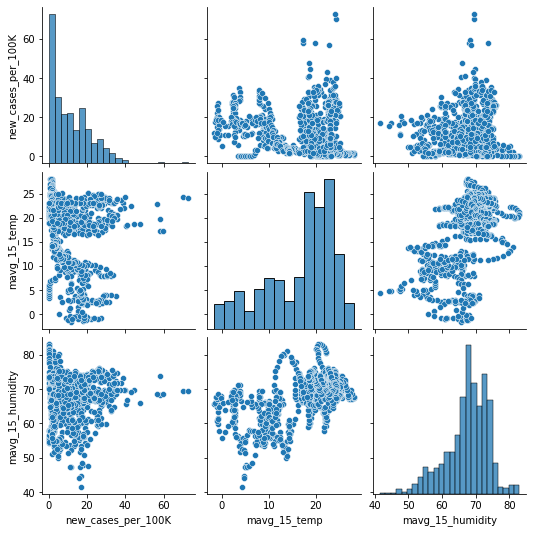

In [16]:
#Pair Plotting to see relationship

PP_NewCases100K= sns.pairplot(data=NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [17]:
#extract relevant coloumns to check the relations- new_cases_per_100K with mavg_15_temp and mavg_15_humidity

MAVG7NewCases100K = Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (MAVG7NewCases100K.shape)
MAVG7NewCases100K.head()

(886, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.0,3.50,56.27
1,2020-03-01,0.0,3.43,55.59
2,2020-03-02,0.0,3.82,55.35
3,2020-03-03,0.0,4.19,54.40
4,2020-03-04,0.0,4.58,55.59


In [18]:
# Spearman correlation test 
MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,-0.262260,0.017082
mavg_15_temp,-0.262260,1.000000,0.536320
mavg_15_humidity,0.017082,0.536320,1.000000


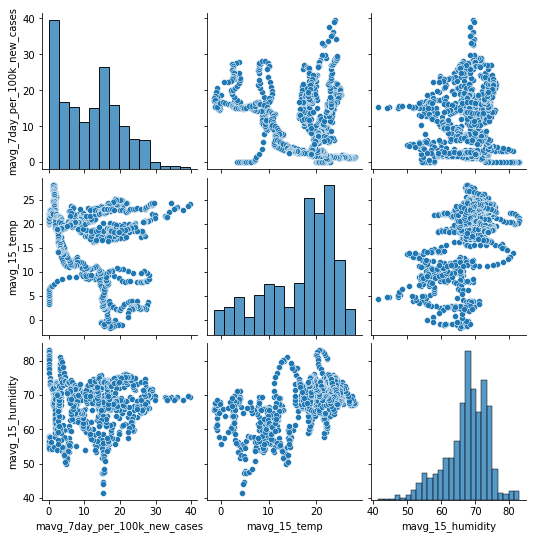

In [19]:
#Pair Plotting to see relationship
PP_MAVG7NewCases100K = sns.pairplot(data=MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])

# Correlation- New York Only (Combined Data) 


In [20]:
#extract only NY data
NY_Combined_df = Combined_df.loc[Combined_df['City']=='New York']
print (NY_Combined_df.shape)
NY_Combined_df.head()

(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


New Cases Per 100K with MAVG 15 days Temp and Humidity

In [21]:
#extract relevant coloumns to check the relations- NY new_cases_per_100K with mavg_15_temp and mavg_15_humidity

NY_NewCases100K = NY_Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (NY_NewCases100K.shape)
NY_NewCases100K.head()

(443, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.01,3.50,56.27
1,2020-03-01,0.00,3.43,55.59
2,2020-03-02,0.00,3.82,55.35
3,2020-03-03,0.01,4.19,54.40
4,2020-03-04,0.03,4.58,55.59


In [22]:
# Spearman correlation test 
NY_NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,-0.790203,-0.249525
mavg_15_temp,-0.790203,1.000000,0.380293
mavg_15_humidity,-0.249525,0.380293,1.000000


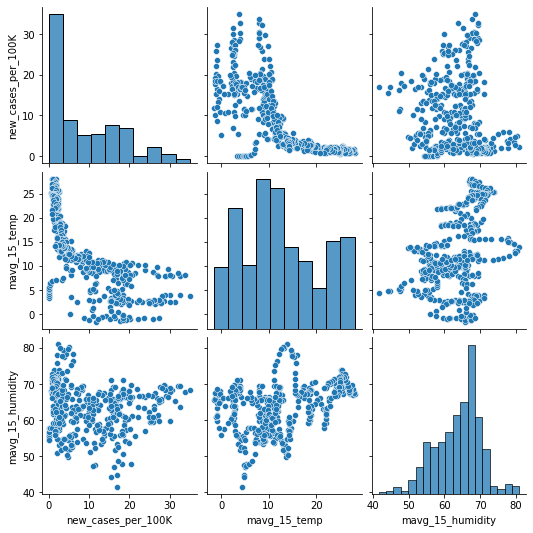

In [23]:
#Pair Plotting to see relationship

#PP_NY_NewCases_dailyTH = sns.pairplot(data=NY_NewCases_dailyTH, y_vars=['New_Cases'],x_vars=['daily_temp', 'daily_humidity'])

PP_NY_NewCases100K= sns.pairplot(data=NY_NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [24]:
#extract relevant coloumns to check the relations- NY Moving 7 days Avgs

NY_MAVG7NewCases100K = NY_Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (NY_MAVG7NewCases100K.shape)
NY_MAVG7NewCases100K.head()

(443, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.0,3.50,56.27
1,2020-03-01,0.0,3.43,55.59
2,2020-03-02,0.0,3.82,55.35
3,2020-03-03,0.0,4.19,54.40
4,2020-03-04,0.0,4.58,55.59


In [25]:
# Spearman correlation test 
NY_MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,-0.806549,-0.247778
mavg_15_temp,-0.806549,1.000000,0.380293
mavg_15_humidity,-0.247778,0.380293,1.000000


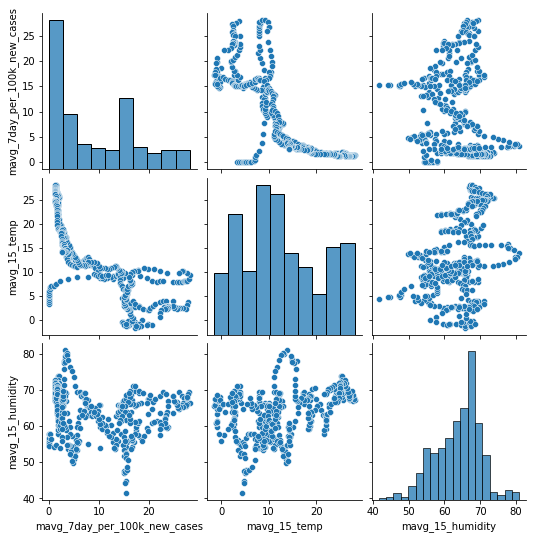

In [26]:
#Pair Plotting to see relationship

#PP_NY_MAVG7NewCases_TH = sns.pairplot(data=NY_MAVG7NewCases_TH, y_vars=['mavg_7day_new_cases'],x_vars=['mavg_7_temp', 'mavg_7_humidity'])

PP_NY_MAVG7NewCases100K = sns.pairplot(data=NY_MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])

# Correlation- Sau Paulo Only (Combined Data)

In [27]:
#extract only SP data
SP_Combined_df = Combined_df.loc[Combined_df['City']=='Sao Paulo']
print (SP_Combined_df.shape)
SP_Combined_df.head()

(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,2020-02-29,Sao Paulo,0,0,0.00,0.0,20.47,85.96,20.22,83.51,22.21,80.34
444,2020-03-01,Sao Paulo,0,0,0.00,0.0,19.50,85.50,20.37,83.58,22.16,80.81
445,2020-03-02,Sao Paulo,0,0,0.00,0.0,19.61,85.81,20.49,84.47,21.90,81.65
446,2020-03-03,Sao Paulo,0,0,0.00,0.0,19.17,85.53,20.32,85.33,21.61,82.19
447,2020-03-04,Sao Paulo,1,0,0.01,0.0,19.61,79.08,19.79,85.83,21.24,82.76


New Cases Per 100K with MAVG 15 days Temp and Humidity

In [28]:
#extract relevant coloumns to check the relations- SP new_cases_per_100K with mavg_15_temp and mavg_15_humidity

SP_NewCases100K = SP_Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (SP_NewCases100K.shape)
SP_NewCases100K.head()


(443, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
443,2020-02-29,0.00,22.21,80.34
444,2020-03-01,0.00,22.16,80.81
445,2020-03-02,0.00,21.90,81.65
446,2020-03-03,0.00,21.61,82.19
447,2020-03-04,0.01,21.24,82.76


In [29]:
# Spearman correlation test 
SP_NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,0.031699,-0.108985
mavg_15_temp,0.031699,1.000000,0.229871
mavg_15_humidity,-0.108985,0.229871,1.000000


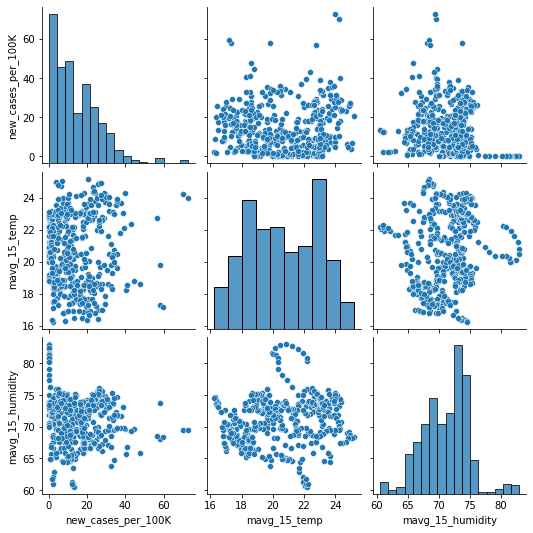

In [30]:
#Pair Plotting to see relationship

PP_SP_NewCases100K= sns.pairplot(data=SP_NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [31]:
#extract relevant coloumns to check the relations- SP mavg_7day_per_100k_new_cases with mavg_15_temp and mavg_15_humidity

SP_MAVG7NewCases100K = SP_Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (SP_MAVG7NewCases100K.shape)
SP_MAVG7NewCases100K.head()

(443, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
443,2020-02-29,0.0,22.21,80.34
444,2020-03-01,0.0,22.16,80.81
445,2020-03-02,0.0,21.90,81.65
446,2020-03-03,0.0,21.61,82.19
447,2020-03-04,0.0,21.24,82.76


In [32]:
# Spearman correlation test 
SP_MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,0.052446,-0.115080
mavg_15_temp,0.052446,1.000000,0.229871
mavg_15_humidity,-0.115080,0.229871,1.000000


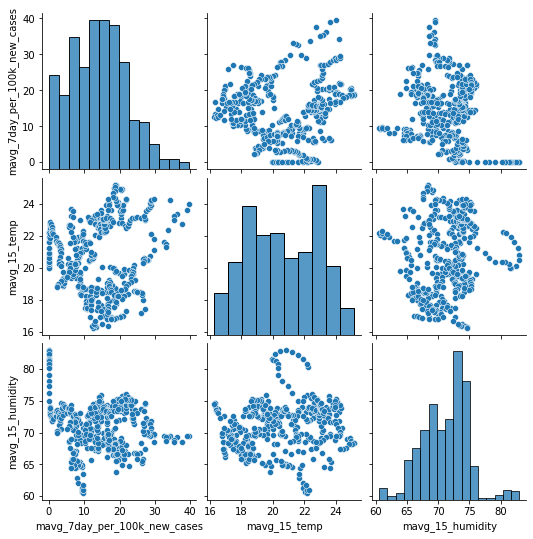

In [33]:
#Pair Plotting to see relationship

PP_SP_MAVG7NewCases100K= sns.pairplot(data=SP_MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])

# Linear Regression Analysis-Both Cities

# Linear Regression- New York alone

In [259]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Use the Sklearn `train_test_split()` function to split the data into training and testing data

In [233]:
print(NY_Combined_df.shape)
NY_Combined_df.head()


(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [234]:
NY_Combined_Reg= NY_Combined_df.drop(["Reported_Date","City"], axis=1)
NY_Combined_Reg.head()

,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


Regression- 15 Day Avg Temp' and '15 Day Avg Humidity' against 'NewCases'

In [249]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = NY_Combined_Reg["mavg_15_temp"].values.reshape(-1, 1)
y = NY_Combined_Reg["New_Cases"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (443, 1) (443, 1)


<AxesSubplot:xlabel='mavg_15_humidity', ylabel='New_Cases'>

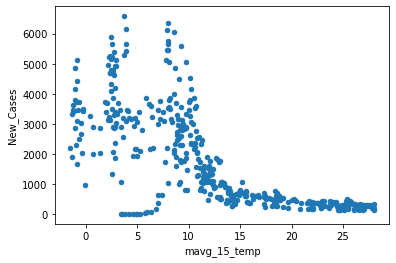

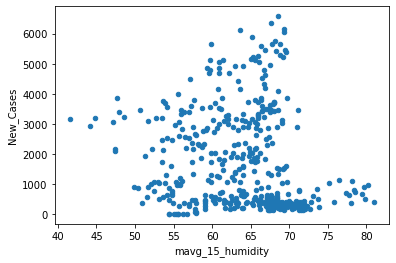

In [250]:
# Plot a scatter plot of '15 Day Avg Temp' and '15 Day Avg Humidity' against 'NewCases'
NY_Combined_Reg.plot(kind='scatter', x='mavg_15_temp', y='New_Cases')
NY_Combined_Reg.plot(kind='scatter', x='mavg_15_humidity', y='New_Cases')

Regression- 15 Day Avg Temp' and '15 Day Avg Humidity' against 'New Cases per 100 K'


In [264]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = NY_Combined_Reg["mavg_15_temp"].values.reshape(-1, 1)
y = NY_Combined_Reg["new_cases_per_100K"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (443, 1) (443, 1)


<AxesSubplot:xlabel='mavg_15_humidity', ylabel='new_cases_per_100K'>

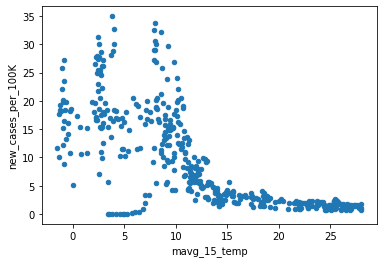

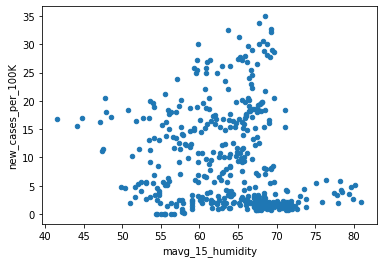

In [265]:
# Plot a scatter plot of '15 Day Avg Temp' and '15 Day Avg Humidity' against 'new_cases_per_100K'
NY_Combined_Reg.plot(kind='scatter', x='mavg_15_temp', y='new_cases_per_100K')
NY_Combined_Reg.plot(kind='scatter', x='mavg_15_humidity', y='new_cases_per_100K')

Model 1- with typical train and test split

In [289]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60,test_size=0.40, random_state=42)

In [290]:
# Create the model
model = LinearRegression()

In [291]:
# Fit the model to the training data. 
model.fit(X_train, y_train)


LinearRegression()

In [297]:
# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_test, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_test, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model.coef_)
print('intercept:', model.intercept_)


mean squared error (MSE): 43.438071862848375
R-squared (R2): 0.42308149291579844
Coefficients: 
 [[-0.74127973]]
intercept: [18.76845499]


In [270]:
# Call the `score()` method on the model to show the R2 score
model.score(X_test, y_test)

0.42153787988291846

Model 2- without splitting the data, keep everything in train